# Case Study-1 : Retail Dataset
***

## Analysis Workflow:

This casestudy will follow the below mentioned workflow or processes:
  1. ASK</n>
  2. PREPARE</br>
  3. PROCESS</br>
  4. ANALYZE</br>
  5. SHARE</br>
  6. ACT
    
As this case study is for study purpose and the dataset is from a hypothetical retail joint, the ACT phase won't be carried out.

## Business Problem (ASK):

**A Retail store is required to analyze the day-to-day transactions and keep a track of its customers spread across various locations along with their purchases/returns across various categories.**

As part of the analysis, results as mentioned are required to be identified:
   1. Popular product categories between male and female customers
   2. Highest revenue location - location wise splitup of sales
   3. Impact of storetype in sales & revenue generation
   4. What is the highest earning product category

## Data Preperation (PREPARE):

Data data was already provided for the casestudy and no survey or collection needs to be done.

## Data Processing (PROCESS):

cleaning the data and merging the data sets to create an analysis ready dataset.

In [1]:
# importing all the libraries required

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
# get working directory (CWD)
path = os.getcwd()

#importing files from the directory

customer = pd.read_csv("../input/retail-casestudy-dataset/Customer.csv", sep=',')
transactions = pd.read_csv("../input/retail-casestudy-dataset/Transactions.csv", sep=',')
prod_cat_info = pd.read_csv("../input/retail-casestudy-dataset/prod_cat_info.csv", sep=',')

#### Getting information about all data sets to see the attributes and datatypes and also the shape. </br>
#### This is to understand how to merge the datasets and which should be the primary key.

In [3]:
print(prod_cat_info.info())
prod_cat_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes
None


,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [4]:
print(transactions.info())
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB
None


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [5]:
customer.info()
customer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [6]:
print(f"Unique customer ID's in Transactions Dataframe: {len(transactions.cust_id.unique())}")

Unique customer ID's in Transactions Dataframe: 5506


In [7]:
print(f"Unique customer ID's in Csutomer Dataframe: {len(customer.customer_Id.unique())}")

Unique customer ID's in Csutomer Dataframe: 5647


#### Few attributes that are common to datasets (Primary Key) for merging the data are not of same name. Hence maintaining same nomenclature for common attribues. </br>
#### Here transaction dataset nomenclature were kept as standard for renaming the datasets

In [8]:
# renaming customer dataset as per the transaction dataset
customer.rename(columns={'customer_Id': 'cust_id'}, inplace=True)
customer.head()

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [9]:
prod_cat_info.rename(columns={'prod_sub_cat_code': 'prod_subcat_code'}, inplace=True)
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


#### The attribute names were standardized. Now datasets are to be merged for further processing.

In [10]:
final = transactions.merge(prod_cat_info, how='left',
                           on=['prod_cat_code', 'prod_subcat_code']
                )
final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY


In [11]:
final = final.merge(customer, how='left',
                           on=['cust_id']
                )
print(final.info())
final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
 10  prod_cat          23053 non-null  object 
 11  prod_subcat       23053 non-null  object 
 12  DOB               23053 non-null  object 
 13  Gender            23044 non-null  object 
 14  city_code         23045 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB
None


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0


In [12]:
# Checking for null values in the datasets

print("Total null values in the columns are :")
final.isnull().sum()

Total null values in the columns are :


transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
DOB                 0
Gender              9
city_code           8
dtype: int64

**There are null values in Gender and City code columns. The instances with null values are to be removed.**

In [13]:
final.dropna(how='any', axis=0, inplace=True)
final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
DOB                 0
Gender              0
city_code           0
dtype: int64

**All null value entries were cleared.**

**Transaction ID must be unique entry and the same attribute must be searched for any redundant entry of incorrect entry.**

In [14]:
# checking for duplicate transaction id's for redundant data entry

print(f"Total duplicate transaction entries: {final.duplicated(subset=['transaction_id']).sum()}")

Total duplicate transaction entries: 2174


In [15]:
# deleting the duplicated entries from the dataset

final.drop_duplicates(subset=['transaction_id'], inplace=True)
print(f"Total duplicate transaction entries after cleaning: {final.duplicated(subset=['transaction_id']).sum()}")

Total duplicate transaction entries after cleaning: 0


In [16]:
# Transaction date attribute & DOB is of object datatype and must be converted to DateTime formate

final['tran_date'] = pd.to_datetime(final['tran_date'])
final['DOB'] = pd.to_datetime(final['DOB'])
final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-08-06,M,3.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,1982-09-10,F,6.0


**The dataset contains attributes like total amount, tax, quantity and rate of item purchased. These attributes must always have a positive float value and negative values are erroneous.**

**All the instances with negative values for aforementioned attributes must be removed. Before that the count of th same is calculated below.**

In [17]:
final.where(final[['Qty','Rate','total_amt']] < 0)[['Qty','Rate','total_amt']].count()

Qty          2058
Rate         2058
total_amt    2058
dtype: int64

**Retriving Year and Month data from the transaction date and adding those attributes to the dataset.**

In [18]:
final['Month'] = final['tran_date'].apply(lambda x: x.month_name())
final['Year'] = final['tran_date'].apply(lambda x: x.year)

**Calculating age of each customer from the DOB attribute.**

In [19]:
# defining a funciton to calculate age from DOB
def age(x):
    return (round((dt.datetime.now()-x).total_seconds()/31536000,1))
    
final['Age'] = final['DOB'].apply(lambda x: age(x))

**Deleting the negative instances**

In [20]:
final.drop(final[final[['Qty','Rate','total_amt']] < 0].dropna(axis=0, how='all').index, axis=0, inplace=True)
final.reset_index(drop=True, inplace=True)
print(final.dtypes)
final.head(n=10)

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
Month                       object
Year                         int64
Age                        float64
dtype: object


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,Month,Year,Age
0,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,1986-10-13,M,1.0,February,2014,35.3
1,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,1971-09-03,M,6.0,February,2014,50.4
2,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,1970-06-26,F,10.0,February,2014,51.6
3,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,1979-06-27,M,9.0,February,2014,42.6
4,54295803788,270787,2014-02-20,12,5,5,584,306.600,3226.600,e-Shop,Books,Academic,1973-10-09,F,6.0,February,2014,48.3
5,25963520987,274829,2014-02-20,4,4,3,502,158.130,1664.130,Flagship store,Bags,Women,1984-05-09,F,2.0,February,2014,37.8
6,17183929085,266863,2014-02-20,1,2,1,1359,142.695,1501.695,TeleShop,Footwear,Mens,1972-11-17,M,6.0,February,2014,49.2
7,44783317894,269452,2014-02-20,3,1,3,825,259.875,2734.875,TeleShop,Clothing,Kids,1979-09-18,F,2.0,February,2014,42.4
8,58957828601,269009,2014-02-20,11,5,4,846,355.320,3739.320,TeleShop,Books,Children,1977-12-07,M,2.0,February,2014,44.2
9,9647515879,268934,2014-02-20,7,5,3,1384,435.960,4587.960,TeleShop,Books,Fiction,1980-07-18,F,7.0,February,2014,41.6


## Data Analysis (ANALYZE):

**Getting statistical information on the dataset**

In [21]:
final[['Qty','Rate','Tax','total_amt']].describe()

,Qty,Rate,Tax,total_amt
count,18804.000000,18804.000000,18804.000000,18804.000000
mean,2.999096,784.723197,246.944734,2598.799339
std,1.420386,415.484411,186.091706,1958.393665
min,1.000000,70.000000,7.350000,77.350000
25%,2.000000,426.000000,97.440000,1025.440000
50%,3.000000,785.500000,197.610000,2079.610000
75%,4.000000,1147.000000,361.620000,3805.620000
max,5.000000,1500.000000,787.500000,8287.500000


**Finding out the time span of the data.**

In [22]:
days = final['tran_date'][0] - final['tran_date'][-1:]
days= int(days.to_string(index=False)[:-4])
print(f"The data spreads over a span of {days} days or {round(days/365 , 2)} years")

The data spreads over a span of 1122 days or 3.07 years


**Total revenue from the retail outlet for the above time span is calculated below.**

In [23]:
total_revenue = final['total_amt'].sum()
print(f"Total revenue from the retail outlet is Rs.{round(total_revenue, 4)}")

Total revenue from the retail outlet is Rs.48867822.77


**Total No. of customers made purchase from this retail chain.**

In [24]:
total_cust = len(final['cust_id'].unique())
print(f"Total No. of customers purchased from this retail business is: {total_cust}")

Total No. of customers purchased from this retail business is: 5440


**Product category & sub-category-wise sales are calculated to identify the category wise contribution to total sales and revenue.**

In [25]:
category_sales = final.groupby(['prod_cat'],as_index=False)['transaction_id'].count()
category_sales.rename(columns = {'prod_cat':'Product Category','transaction_id':'No. of Sales'}, inplace=True)
category_sales

,Product Category,No. of Sales
0,Bags,1592
1,Books,4928
2,Clothing,2405
3,Electronics,4089
4,Footwear,2435
5,Home and kitchen,3355


In [26]:
sub_category_sales = final.groupby(['prod_cat','prod_subcat'],as_index=False)['transaction_id'].count()
sub_category_sales.rename(columns = {'prod_cat':'Product Category','prod_subcat':'Product Sub-Category','transaction_id':'No. of Sales'}, inplace=True)
sub_category_sales

,Product Category,Product Sub-Category,No. of Sales
0,Bags,Mens,808
1,Bags,Women,784
2,Books,Academic,766
3,Books,Children,837
4,Books,Comics,834
5,Books,DIY,824
6,Books,Fiction,838
7,Books,Non-Fiction,829
8,Clothing,Kids,817
9,Clothing,Mens,785


**The category wise sales percentage is shown as a pie chart shown below.**

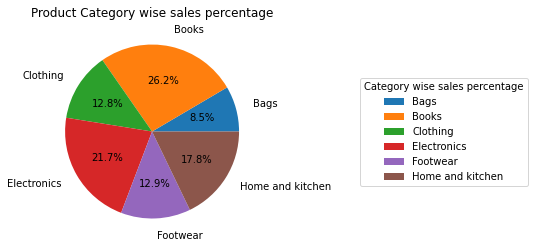

In [27]:
# Defining the function to calculate the percentage
def percent(x,y):
    return(x*100/y)

category_sales['Sales_percentage'] = category_sales.groupby(by='Product Category')['No. of Sales'].apply(lambda x: percent(x,category_sales['No. of Sales'].sum()))

plt.pie(category_sales['Sales_percentage'],  
        autopct = "%1.1f%%",
        labels=category_sales['Product Category'], 
        labeldistance= 1.2,
        rotatelabels=False)
plt.title('Product Category wise sales percentage')
plt.legend(title='Category wise sales percentage',
           loc = 'center right',
           bbox_to_anchor =(1.75, 0, 0.5, 1))
plt.show()

### *From the demographic, it is evident that the contribution by Books & Electronics to total revenue/sales is major.

**Yearwise sales calculation.**

In [28]:
yearly_sales = final.groupby(by=['Year','Month'], as_index=False).agg({
    'transaction_id':'count',
    'total_amt':'sum'
})
yearly_sales.rename(columns={'transaction_id':'No. of Sales', 'total_amt':'Total Revenue'}, inplace=True)
yearly_sales.head()

,Year,Month,No. of Sales,Total Revenue
0,2011,April,501,1347259.095
1,2011,August,464,1165075.535
2,2011,December,485,1195754.755
3,2011,February,432,1110025.540
4,2011,January,301,803159.305


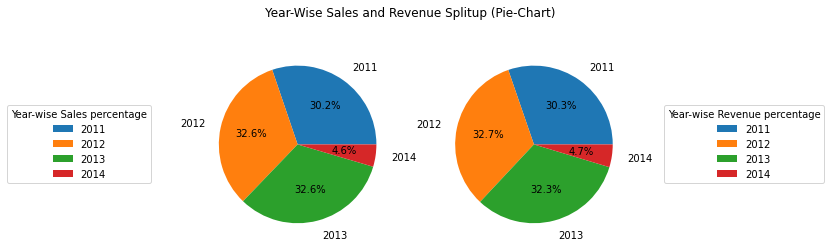

In [29]:
plt.suptitle('Year-Wise Sales and Revenue Splitup (Pie-Chart)')
plt.subplot(1,3,1)
plt.pie(yearly_sales.drop('Month', axis=1).groupby(by=['Year'], as_index=False).agg({'No. of Sales':'sum', 'Total Revenue':'sum'})['No. of Sales'],  
        autopct = "%1.1f%%",
        labels=yearly_sales.drop('Month', axis=1).groupby(by=['Year'], as_index=False).agg({'No. of Sales':'count', 'Total Revenue':'sum'})['Year'], 
        labeldistance= 1.2,
        radius = 2,
        rotatelabels=False)
plt.legend(title='Year-wise Sales percentage',
           loc = 'center left',
           bbox_to_anchor =(-2.5, 0.5, 0, 0))

plt.subplot(1,3,3)
plt.pie(yearly_sales.drop('Month', axis=1).groupby(by=['Year'], as_index=False).agg({'No. of Sales':'count', 'Total Revenue':'sum'})['Total Revenue'],  
        autopct = "%1.1f%%",
        labels=yearly_sales.drop('Month', axis=1).groupby(by=['Year'], as_index=False).agg({'No. of Sales':'count', 'Total Revenue':'sum'})['Year'], 
        labeldistance= 1.2,
        radius=2,
        rotatelabels=False)
plt.legend(title='Year-wise Revenue percentage',
           loc = 'center right',
           bbox_to_anchor =(3, 0, 0.5, 1))
plt.show()

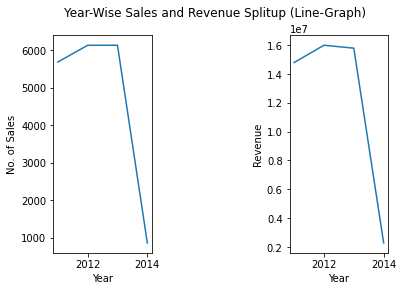

In [30]:
plt.suptitle('Year-Wise Sales and Revenue Splitup (Line-Graph)')
plt.subplot(1,3,1)
plt.plot(yearly_sales.drop('Month', axis=1).groupby(by=['Year'], as_index=False).agg({'No. of Sales':'sum', 'Total Revenue':'sum'})['Year'],
        yearly_sales.drop('Month', axis=1).groupby(by=['Year'], as_index=False).agg({'No. of Sales':'sum', 'Total Revenue':'sum'})['No. of Sales']
        )
plt.xlabel('Year')
plt.ylabel('No. of Sales')

plt.subplot(1,3,3)
plt.plot(yearly_sales.drop('Month', axis=1).groupby(by=['Year'], as_index=False).agg({'No. of Sales':'count', 'Total Revenue':'sum'})['Year'],  
        yearly_sales.drop('Month', axis=1).groupby(by=['Year'], as_index=False).agg({'No. of Sales':'count', 'Total Revenue':'sum'})['Total Revenue']
        )
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()

### *2012 is the most profitable year and 2014 is the least profitable year. Total revenue from year 2014 is approx. 1/8th of total 2012 sales.

**Customer Age & Customer transaction amount details such as mean, minimum and maximum are calculculated and plotted.**

<Figure size 432x288 with 0 Axes>

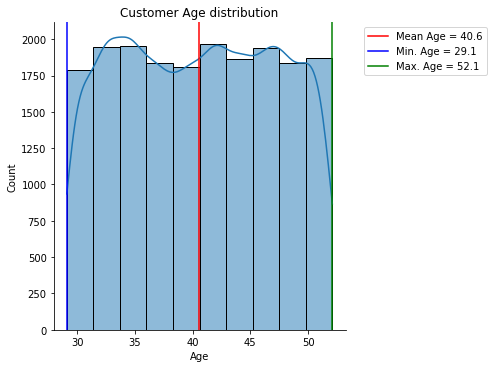

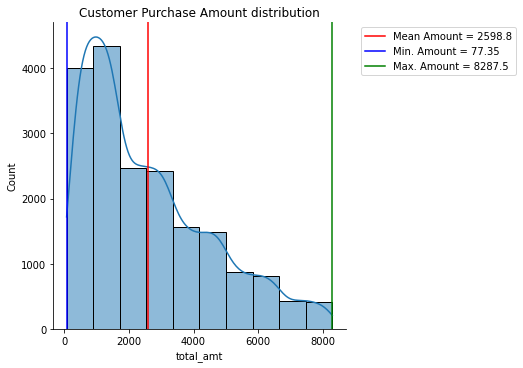

In [31]:
plt.suptitle('Distribution of Customer Age and Customer Purchase Amount')

sns.displot(final['Age'], bins=10, kde=True).set(title='Customer Age distribution')
plt.axvline(final['Age'].mean(), color='r', label="Mean Age = "+str(round(final['Age'].mean(),1)))
plt.axvline(final['Age'].min(), color='b', label="Min. Age = "+str(final['Age'].min()))
plt.axvline(final['Age'].max(), color='g', label="Max. Age = "+str(final['Age'].max()))
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1,0,0))
plt.show()

sns.displot(final['total_amt'], bins=10, kde=True).set(title='Customer Purchase Amount distribution')
plt.axvline(final['total_amt'].mean(), color='r', label="Mean Amount = "+str(round(final['total_amt'].mean(),1)))
plt.axvline(final['total_amt'].min(), color='b', label="Min. Amount = "+str(final['total_amt'].min()))
plt.axvline(final['total_amt'].max(), color='g', label="Max. Amount = "+str(final['total_amt'].max()))
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1,0,0))
plt.show()

**Gender wise sales split of each product category is plotted here.**

In [32]:
final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum()

,prod_cat,Gender,total_amt
0,Bags,F,2101984.040
1,Bags,M,2057860.285
2,Books,F,6210377.355
3,Books,M,6672257.410
4,Clothing,F,3053488.490
5,Clothing,M,3246209.330
6,Electronics,F,5036176.730
7,Electronics,M,5739437.405
8,Footwear,F,3226672.930
9,Footwear,M,3036753.265


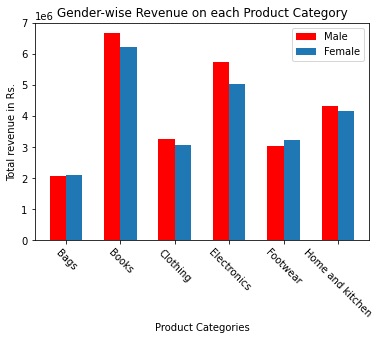

In [33]:
x = np.arange(len(final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum()['prod_cat'].unique()))

y_male = final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum()
y_male = y_male.where(y_male['Gender']=='M')['total_amt'].dropna()


y_female = final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum()
y_female = y_female.where(y_female['Gender']=='F')['total_amt'].dropna()

plt.bar(x-0.15 ,y_male ,0.3, label='Male', color='r')
plt.bar(x+0.15 ,y_female, 0.3, label='Female')

plt.xticks(x, final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum()['prod_cat'].unique(), rotation=-45)
plt.title('Gender-wise Revenue on each Product Category')
plt.xlabel("Product Categories")
plt.ylabel('Total revenue in Rs.')
plt.legend()
plt.show()

In [34]:
print(f"Total revenue from male customers : \033[1m{round(y_male.sum(),2)}\033[0m")
print(f"Total revenue from male customer are \033[1m{round(y_male.sum()*100/total_revenue,2)}% \033[0m of total revenue")

Total revenue from male customers : 25082398.32
Total revenue from male customer are 51.33%  of total revenue


In [35]:
male_elec = final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum()

print(f"Total revenue from Male customer through Electronic products is : \033[1m{round(male_elec.loc[(male_elec['Gender'] == 'M') & (male_elec['prod_cat']=='Electronics')]['total_amt'].item(),2)}\033[0m")

Total revenue from Male customer through Electronic products is : 5739437.41


In [36]:
male_prod = final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum().where(
    final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum()['Gender']=='M'
).dropna()
male_prod=male_prod.loc[male_prod['total_amt'].idxmax()]['prod_cat']

male_amt = final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum().where(
    final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum()['Gender']=='M'
).dropna()
male_amt = male_amt.loc[male_amt['total_amt'].idxmax()]['total_amt']

female_prod = final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum().where(
    final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum()['Gender']=='F'
).dropna()
female_prod=female_prod.loc[female_prod['total_amt'].idxmax()]['prod_cat']

female_amt = final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum().where(
    final.groupby(by=['prod_cat','Gender'],as_index=False)['total_amt'].sum()['Gender']=='F'
).dropna()
female_amt = female_amt.loc[female_amt['total_amt'].idxmax()]['total_amt']

print("\033[1m From the graph above, it is evident that the most popular category is Books \033[0m")
print()
print(f"Most popular product among male cusomers is: \033[1m{male_prod}\033[0m & Total revenue in this category is: \033[1m{round(male_amt,2)}\033[0m")
print(f"Most popular product among female cusomers is: \033[1m{female_prod}\033[0m & Total revenue in this category is: \033[1m{round(female_amt,2)}\033[0m")

 From the graph above, it is evident that the most popular category is Books 

Most popular product among male cusomers is: Books & Total revenue in this category is: 6672257.41
Most popular product among female cusomers is: Books & Total revenue in this category is: 6210377.36


**City-wise sales and customer share.**

In [37]:
city_sales = final.groupby(by=['city_code'], as_index=False).agg({'cust_id':lambda x: x.nunique()}) 
city_sales['cust_percent'] = city_sales['cust_id'].apply(lambda x: x*100/total_cust)
city_sales.loc[city_sales['cust_percent'].idxmax()]

print(f"City Code with Maximum number of customers is: \033[1m{city_sales.loc[city_sales['cust_percent'].idxmax()]['city_code']}\033[0m \nTotal number of customers from this city is: \033[1m{city_sales.loc[city_sales['cust_percent'].idxmax()]['cust_id']}\033[0m \nPercentage of customers out of total customers from this city is: \033[1m{round(city_sales.loc[city_sales['cust_percent'].idxmax()]['cust_percent'],2)}%\033[0m")

City Code with Maximum number of customers is: 3.0 
Total number of customers from this city is: 569.0 
Percentage of customers out of total customers from this city is: 10.46%


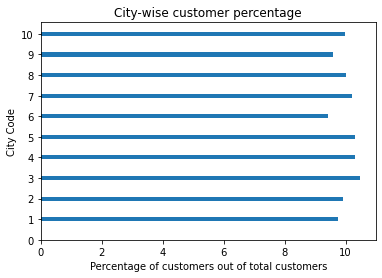

In [38]:
plt.barh(city_sales['city_code'],
        city_sales['cust_percent'], 0.2
)
plt.yticks(np.arange(0,len(city_sales['city_code'])+1,1))
plt.title('City-wise customer percentage')
plt.ylabel('City Code')
plt.xlabel('Percentage of customers out of total customers')
plt.show()

In [39]:
city_rev = final.groupby(by=['city_code'], as_index=False).agg({'total_amt':'sum'}) 
city_rev.loc[city_rev['total_amt'].idxmax()]
print(f"City with Maximum revenue is: \033[1m{city_rev.loc[city_rev['total_amt'].idxmax()]['city_code']}\033[0m and the revenue from this city is: \033[1m{round(city_rev.loc[city_rev['total_amt'].idxmax()]['total_amt'],2)}\033[0m")

City with Maximum revenue is: 3.0 and the revenue from this city is: 5192428.15


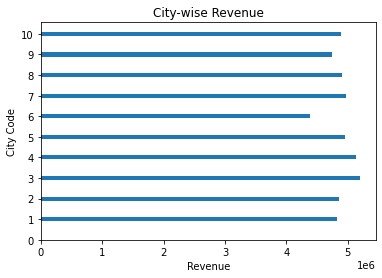

In [40]:
plt.barh(city_rev['city_code'],
        city_rev['total_amt'], 0.2
)
plt.yticks(np.arange(0,len(city_sales['city_code'])+1,1))
plt.title('City-wise Revenue')
plt.ylabel('City Code')
plt.xlabel('Revenue')
plt.show()

**Store wise sales.**

In [41]:
final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,Month,Year,Age
0,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,1986-10-13,M,1.0,February,2014,35.3
1,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,1971-09-03,M,6.0,February,2014,50.4
2,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,1970-06-26,F,10.0,February,2014,51.6
3,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,1979-06-27,M,9.0,February,2014,42.6
4,54295803788,270787,2014-02-20,12,5,5,584,306.600,3226.600,e-Shop,Books,Academic,1973-10-09,F,6.0,February,2014,48.3


In [42]:
store_sales = final.groupby(by=['Store_type'], as_index=False).agg({'Qty':'count'}) 
store_sales.loc[store_sales['Qty'].idxmax()]

print(f"Maximum quantity of products were sold through \033[1m{store_sales.loc[store_sales['Qty'].idxmax()]['Store_type']}\033[0m and the quantity is \033[1m{store_sales.loc[store_sales['Qty'].idxmax()]['Qty']}\033[0m")

Maximum quantity of products were sold through e-Shop and the quantity is 7592


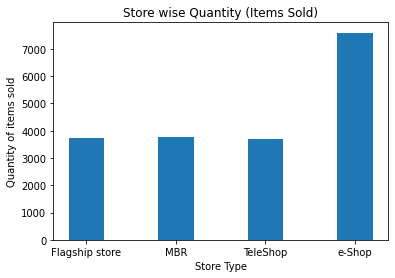

In [43]:
plt.bar(store_sales['Store_type'], store_sales['Qty'], 0.4)

plt.title('Store wise Quantity (Items Sold)')
plt.xlabel('Store Type')
plt.ylabel('Quantity of items sold')
plt.show()

**Flagship stores out of all store categories is considered here to get details product category wise revenue and identify the top seller.**

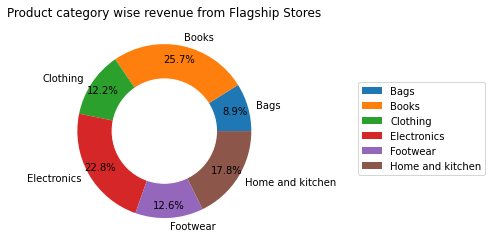

In [44]:
flagship_data = final.groupby(by=['Store_type','prod_cat'], as_index=False).agg({'total_amt':'sum'}).where(final.groupby(by=['Store_type','prod_cat'], as_index=False).agg({'total_amt':'sum'})['Store_type']=='Flagship store').dropna()
plt.pie(flagship_data['total_amt'],
       labels = flagship_data['prod_cat'],
        autopct='%1.1f%%', pctdistance=0.85
       )

cir=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(cir)

plt.title('Product category wise revenue from Flagship Stores')
plt.legend(loc='upper right', bbox_to_anchor=(1,1,1,-0.25))
plt.show()

In [45]:
print(f"Total revenue through electronics items at flagship stores: \033[1m{round(flagship_data.loc[flagship_data['prod_cat'] == 'Electronics']['total_amt'].item(),2)}\033[0m")

print(f"Total revenue through clothing items at flagship stores: \033[1m{round(flagship_data.loc[flagship_data['prod_cat'] == 'Clothing']['total_amt'].item(),2)}\033[0m")

Total revenue through electronics items at flagship stores: 2231201.63
Total revenue through clothing items at flagship stores: 1196491.79


**Identifying repeat customers with more than 10 transactions.**

In [46]:
rep_cust = final.groupby(by=['cust_id'], as_index=False).agg({'transaction_id':'count'})

print(f"Total \033[1m{rep_cust.where(rep_cust['transaction_id']>10).dropna()['cust_id'].count()}\033[0m customers out of total \033[1m{rep_cust['cust_id'].count()}\033[0m have more than 10 unique transactions.")

Total 3 customers out of total 5440 have more than 10 unique transactions.


**Customer group between age 25-35 to be considered for identifying trends and popular product.**

In [47]:
age_study = final.where(final['Age'] < 35).where(final['Age']>25).dropna()[['cust_id','prod_cat','tran_date','total_amt','Gender','Age']]

age_rev = age_study.groupby(by='prod_cat', as_index=False).agg({'total_amt':'sum'})



print("From customers of age between 25 to 35:")
print(f"Percentage of customers that belong to this age group is: \033[1m{round(len(age_study['cust_id'].unique())*100/total_cust,2)}%\033[0m")

print(f"Total revenue from Eletronics is: \033[1m{round(age_rev.where(age_rev['prod_cat'] == 'Electronics').dropna()['total_amt'].item(),2)}\033[0m")

print(f"Total revenue from Books is: \033[1m{round(age_rev.where(age_rev['prod_cat'] == 'Books').dropna()['total_amt'].item(),2)}\033[0m")


From customers of age between 25 to 35:
Percentage of customers that belong to this age group is: 26.18%
Total revenue from Eletronics is: 2812480.25
Total revenue from Books is: 3120896.81


In [48]:
date_rev = age_study.where(final['tran_date'] < dt.datetime(2014,3,1)).where(final['tran_date']>dt.datetime(2014,1,1)).dropna()

print(f"Total Revenue during Time-Period 1st Jan 2014 to 1st Mar 2014 is: \033[1m{round(date_rev['total_amt'].sum(),2)}")

Total Revenue during Time-Period 1st Jan 2014 to 1st Mar 2014 is: 376984.01


## Inferences (SHARE):

Key inferences from the case-study is that:

 1. The total revenue from the retail outlets for 3 years is : 4.88 cr. approx. And the number of transactions done are 18804.
 2. Average transaction amount by customers is 2598.
 3. The total revenue is equally from both male and female customers (51%-49%)
 4. 5440 customer purchased from the store and out of which only 3 purchased for more than 10 times.
 5. 26.2% of customers belong to the age group of 25 to 35. And average customer age is 29. 
 6. Major revenue sources are Books followed by Electronics at the second place.
 7. Maximum number of customers and maximum revenue is from city 3.
 8. Major revenue stream is through E-shops. All the other shop categories contribute approximately equal revenue to the total.


***
***